In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('../net_weights/metrics.csv')
runs = ["resnet152", "resnet152_l1loss", "resnet152_mse", "resnet152_weighted_custom"]
colors = ['red', 'blue', 'green', 'orange']

In [81]:
df.columns

Index(['Unnamed: 0', 'idx', 'step', 'value', 'epoch', 'time', 'run',
       'run.dataloader.batch_size', 'run.dataloader.num_workers',
       'run.environment.epochs', 'run.environment.experiment_name',
       'run.environment.run_name', 'run.environment.seed', 'run.loss.type',
       'run.loss.weights', 'run.model.name', 'run.model.outputs',
       'run.optimizer.lr', 'run.optimizer.momentum', 'run.optimizer.name',
       'run.paths.aim_dir', 'run.paths.images', 'run.paths.net_weights_dir',
       'run.paths.test_dataset', 'run.paths.train_dataset',
       'run.paths.validation_dataset', 'run.scheduler.gamma',
       'run.scheduler.name', 'run.scheduler.step_size', 'metric',
       'context.subset', 'context'],
      dtype='object')

In [82]:
df = df[df.run.str.contains("resnet152")]
df = df[
    (df.run == "resnet152")
    | (df.run == "resnet152_l1loss")
    | (df.run == "resnet152_mse")
    | (df.run == "resnet152_weighted_custom")
]
df = df[['step', 'run', 'value', 'context.subset']]

In [103]:
values = {}

for run in runs:
    values[run] = {}
    for phase in ['train', 'validation']:
        v = df[(df.run == run) & (df['context.subset'] == phase)].value.values
        if np.isnan(v).any() or len(v) == 0:
            values[run][phase] = None
        else:
            values[run][phase] = v

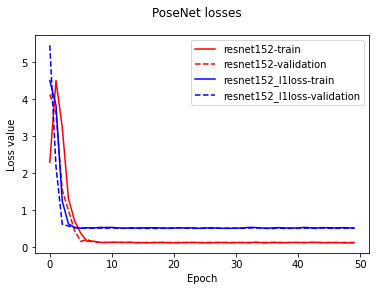

In [132]:
fig, ax = plt.subplots()
for color, (k, v) in zip(colors, values.items()):
    for phase in ['train', 'validation']:
        if v[phase] is not None:
            plt.plot(
                np.arange(len(v[phase])),
                v[phase],
                c=color,
                linestyle='dashed' if phase == 'validation' else 'solid',
                label=f"{k}-{phase}"
            )
ax.set_ylabel("Loss value")
ax.set_xlabel("Epoch")
ax.legend()
fig.suptitle("PoseNet losses")
fig.savefig("../net_weights/posenet_losses.png", dpi=300)
plt.show()